# Sección C) Clasificación de Pedidos
### José Andrés Orantes Guillén
Cada pedido tiene un porqué, poderlo identificar adecuadamente nos permitirá entender mejor las ocasiones de consumo de nuestros clientes. Con tantos mensajes diarios, existe una gran oportunidad de extraer insights. Anexo al correo encontrarás una lista de mensajes generados.
- Genera un clasificador de mensajes de acuerdo a grupos que puedan ser interesantes para el equipo de comercial y marketing.


In [1]:
#Librerias
import pandas as pd
import nltk
from nltk.corpus import stopwords#Palabras vacías
import string#signos de puntuación
import re#limpieza de texto
from nltk.stem import SnowballStemmer #lematización a raíces de las palabras
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Más gráficos
from wordcloud import WordCloud#Nubes de palabras
from collections import Counter# contar palabras más frecuentes

In [2]:
nltk.download('stopwords') #Stopwords/Palabras vacías. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aoran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Datos
df= pd.read_csv("technical_assessment_c (2) (4).csv", encoding='utf-8')
df

,msg_id,mensaje
0,1,Para la mejor profesora y nutriologa del mundo...
1,2,"Los cumpleaÃ±os significan un nuevo comienzo, ..."
2,3,Te extraÃ±o.
3,4,"Abuelita, Muchas felicidades te quiero con t..."
4,5,"Los llevo en todos mis logros conmigo, hoy me ..."
...,...,...
9995,9996,Chipi tu eres un hermoso sol que ilumina cada ...
9996,9997,Gaby: Muchas Felicidades para mi esposa y madr...
9997,9998,CON MUCHO CARIÃ‘O Y RESPETO PARA LA TIA MAS LINDA
9998,9999,MuchÃ­simas Gracias por todo!! Son las mejores...


In [4]:
#Corrección de algunos errores ortográficos.
def clean_data(df):
    df['mensaje'] = df['mensaje'].str.replace("Ã±", "ñ", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Ã¡", "á", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Ã©", "é", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Ã³", "ó", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Ãº", "ú", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Ã­", "í", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Ã‘", "Ñ", case=False, regex=False)
    df['mensaje'] = df['mensaje'].str.replace("Â", "", case=False, regex=False)
    return df

df = clean_data(df)
df.head()

,msg_id,mensaje
0,1,Para la mejor profesora y nutriologa del mundo...
1,2,"Los cumpleaños significan un nuevo comienzo, u..."
2,3,Te extraño.
3,4,"Abuelita, Muchas felicidades te quiero con t..."
4,5,"Los llevo en todos mis logros conmigo, hoy me ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   msg_id   10000 non-null  int64 
 1   mensaje  9726 non-null   object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


Hay 274 valores nulos

In [6]:
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

In [7]:
df=df.dropna(subset=['mensaje'])#Eliminamos valores nulos
def limpiar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)  # eliminar signos de puntuación
    texto = texto.lower()#Minúsculas
    palabras = texto.split() #lista de palabras
    palabras = [p for p in palabras if p not in stop_words and len(p) > 2] #eliminación de stopwords
    return " ".join(palabras) #unimos la lista de palabras en un string

df['mensaje'] = df['mensaje'].apply(limpiar_texto)

C:\Users\aoran\AppData\Local\Temp\ipykernel_32580\807810594.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mensaje'] = df['mensaje'].apply(limpiar_texto)


In [8]:
def lematizar_texto(texto):
    palabras = texto.split() #lista de palabras
    palabras = [stemmer.stem(p) for p in palabras if p not in stop_words and len(p) > 2] #lematización y eliminación de stopwords
    return " ".join(palabras) #unimos la lista de palabras en un string

df['mensaje_lematizado'] = df['mensaje'].apply(lematizar_texto)

C:\Users\aoran\AppData\Local\Temp\ipykernel_32580\624642566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mensaje_lematizado'] = df['mensaje'].apply(lematizar_texto)


In [9]:
df

,msg_id,mensaje,mensaje_lematizado
0,1,mejor profesora nutriologa mundo fuerte abrazo,mejor profesor nutriolog mund fuert abraz
1,2,cumpleaños significan nuevo comienzo tiempo mi...,cumpleañ signific nuev comienz tiemp mir haci ...
2,3,extraño,extrañ
3,4,abuelita muchas felicidades quiero ser pases m...,abuelit much felic quier ser pas mejor dia cum...
4,5,llevo logros conmigo hoy mudo toronto podría u...,llev logr conmig hoy mud toront podr usted ext...
...,...,...,...
9995,9996,chipi hermoso sol ilumina cada dias siento sum...,chipi hermos sol ilumin cad dias sient sum ben...
9996,9997,gaby muchas felicidades esposa madre dos hijos...,gaby much felic espos madr dos hij may 2019 gr...
9997,9998,cariño respeto tia mas linda,cariñ respet tia mas lind
9998,9999,muchísimas gracias mejores pueden temprano hoy,muchisim graci mejor pued tempran hoy


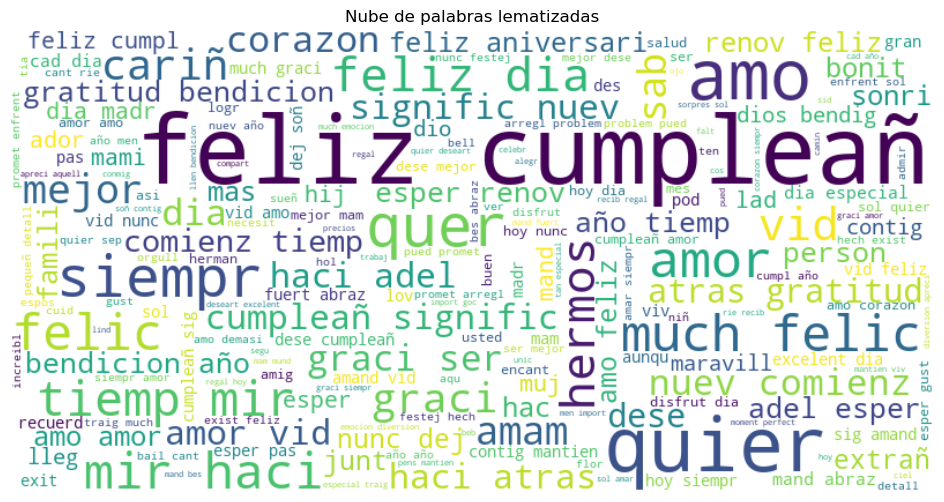

C:\Users\aoran\AppData\Local\Temp\ipykernel_32580\3235523784.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecs), y=list(palabras), palette="Spectral")


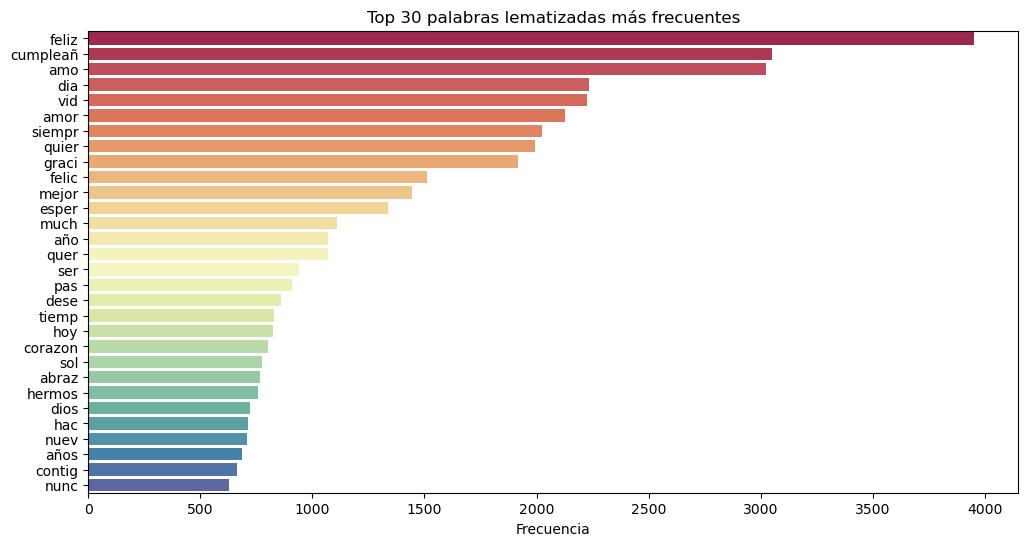

In [10]:
# Nube de palabras
texto_completo = " ".join(df['mensaje_lematizado'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

#Gráfica
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras lematizadas")
plt.show()


palabras = texto_completo.split()
conteo = Counter(palabras).most_common(30)
palabras, frecs = zip(*conteo)

plt.figure(figsize=(12,6))
sns.barplot(x=list(frecs), y=list(palabras), palette="Spectral")
plt.title("Top 30 palabras lematizadas más frecuentes")
plt.xlabel("Frecuencia")
plt.show()


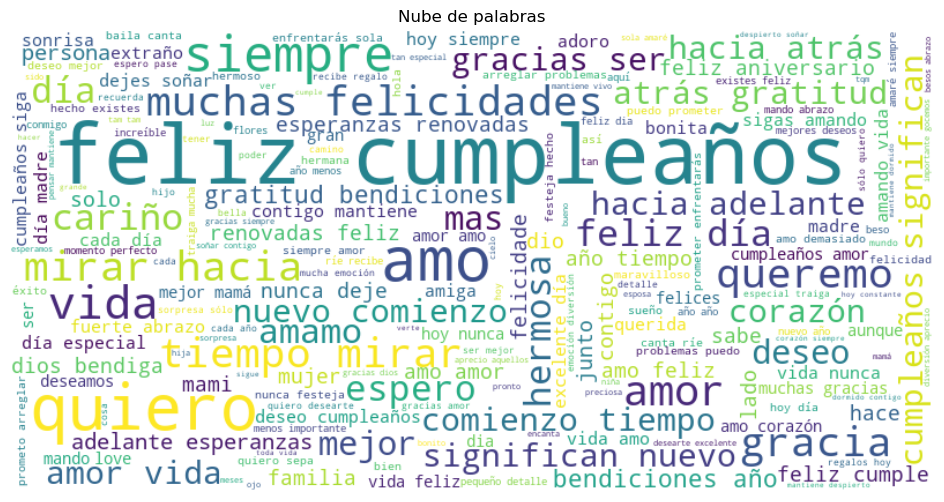

C:\Users\aoran\AppData\Local\Temp\ipykernel_32580\2836475583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecs), y=list(palabras), palette="Spectral")


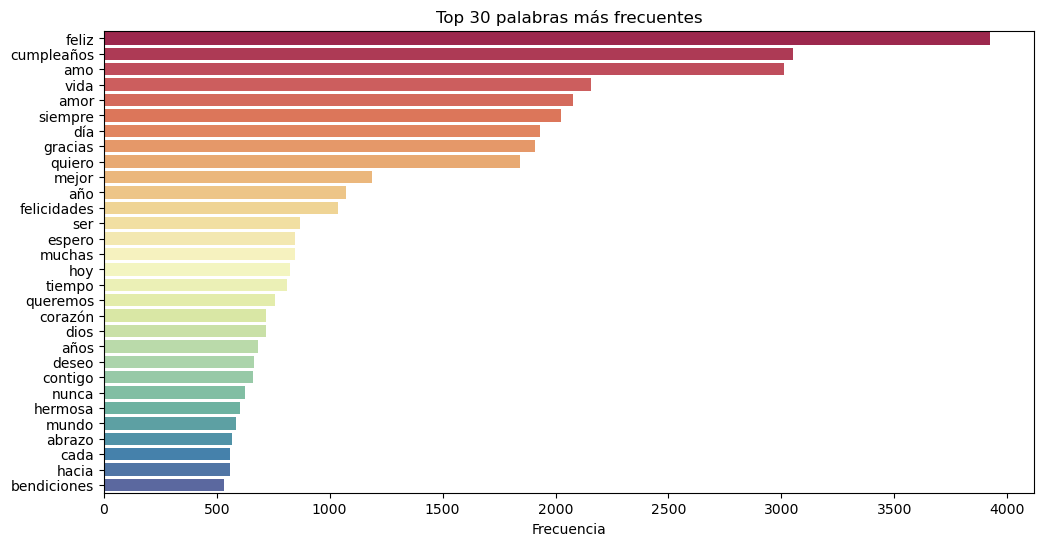

In [11]:
# Nube de palabras
texto_completo = " ".join(df['mensaje'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

#Gráfica
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras")
plt.show()


palabras = texto_completo.split()
conteo = Counter(palabras).most_common(30)
palabras, frecs = zip(*conteo)

plt.figure(figsize=(12,6))
sns.barplot(x=list(frecs), y=list(palabras), palette="Spectral")
plt.title("Top 30 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.show()

## Categorización en base a porqué

In [12]:
df

,msg_id,mensaje,mensaje_lematizado
0,1,mejor profesora nutriologa mundo fuerte abrazo,mejor profesor nutriolog mund fuert abraz
1,2,cumpleaños significan nuevo comienzo tiempo mi...,cumpleañ signific nuev comienz tiemp mir haci ...
2,3,extraño,extrañ
3,4,abuelita muchas felicidades quiero ser pases m...,abuelit much felic quier ser pas mejor dia cum...
4,5,llevo logros conmigo hoy mudo toronto podría u...,llev logr conmig hoy mud toront podr usted ext...
...,...,...,...
9995,9996,chipi hermoso sol ilumina cada dias siento sum...,chipi hermos sol ilumin cad dias sient sum ben...
9996,9997,gaby muchas felicidades esposa madre dos hijos...,gaby much felic espos madr dos hij may 2019 gr...
9997,9998,cariño respeto tia mas linda,cariñ respet tia mas lind
9998,9999,muchísimas gracias mejores pueden temprano hoy,muchisim graci mejor pued tempran hoy


In [13]:
# Diccionario de categorías y posibles palabras contenidas en cada categoría
categorias = {
    'Cumpleaños': ['cumpleañ','feliz','cumplir','cumple','años','año','cumpleaños','nuev','pas','felic','vida','dia'],
    'Aniversario': ['año','aniversari','aniversario','feliz','aniversar','anivers','nuev','cumpl'],
    'Graduación': ['graduación','graduar','graduacion','gradu','felicitaciones','nuev'],
    'Agradecimiento': ['graci','gracias','agradec','agradecimiento','agradezc'],
    'Despedida': ['adiós','adiós','despedida','hasta','despedir','desped'],
    'Bienvenida': ['bienven'],
    'Amor': ['amor', 'querido', 'querida', 'te quiero', 'amo', 'bes','amart','acarici','vid','encant','pareja','corazón','cariño','cariñ'],
    'Felicitaciones': ['felic','felicidades', 'felicitaciones', 'enhorabuena','mejor'],
    'Condolencias': ['lamento', 'tristeza', 'pérdida','perd', 'fallecimiento', 'fallec','lamento','tristez','condolencias'],
    'Disculpas': ['disculp', 'perdón','perdon', 'siento','disculpam'],

}

#Función de clasificación
def clasificador(texto):
    palabras=texto.split()
    puntajes = {categoria: 0 for categoria in categorias.keys()} #inicializamos el diccionario de puntajes
    for palabra in palabras:
        for categoria, palabras_clave in categorias.items():
            if palabra in palabras_clave:
                puntajes[categoria] += 1
    # Devolver la categoría con el puntaje más alto
    categoria_maxima = max(puntajes, key=puntajes.get)
    return categoria_maxima if puntajes[categoria_maxima] > 0 else 'Sin clasificar' #si no hay coincidencias, devuelve 'Sin clasificar'
# Aplicar la función de clasificación a la columna 'mensaje'
df['categoria_ocasiones'] = df['mensaje_lematizado'].apply(clasificador) 

C:\Users\aoran\AppData\Local\Temp\ipykernel_32580\1505993676.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categoria_ocasiones'] = df['mensaje_lematizado'].apply(clasificador)


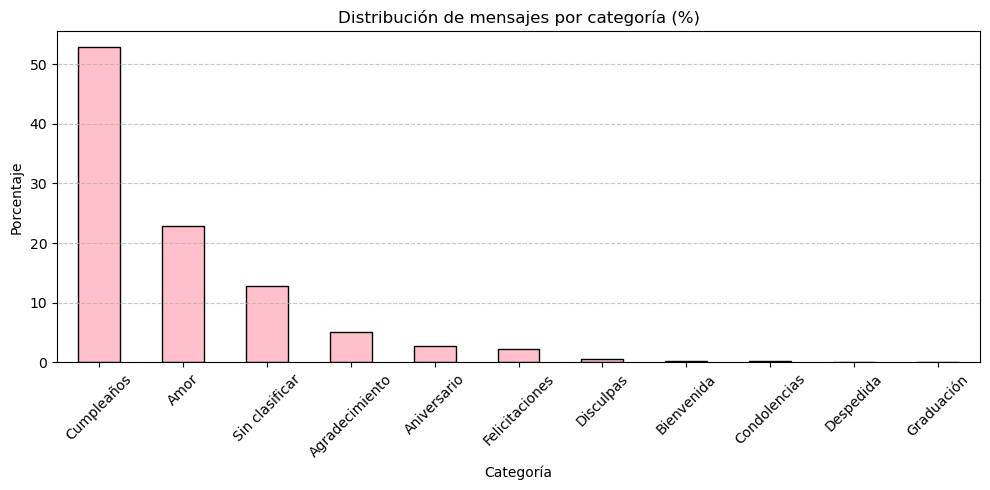

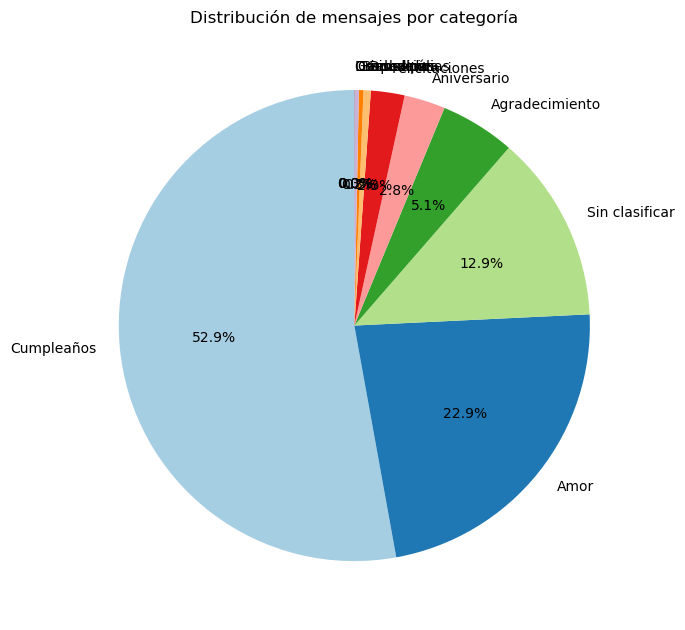

In [ ]:
# Contar frecuencia de cada categoría
conteo = df['categoria_ocasiones'].value_counts()
porcentajes = round(conteo / conteo.sum() * 100, 2)

# Gráfico de barras
plt.figure(figsize=(10, 5))
porcentajes.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Distribución de mensajes por categoría de ocasión (%)')
plt.ylabel('Porcentaje')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pastel
plt.figure(figsize=(7, 7))
porcentajes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de mensajes por categoría de ocasión (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Categorización en base a quién

In [45]:
# Diccionario de categorías y posibles palabras contenidas en cada categoría no lematizada
categorias = {
    'Madre': ['mamá', 'mamita', 'mami', 'madre', 'vieja', 'viejita', 'mama','madrecita','amo','quiero','flaca'],
    'Padre': ['papá', 'papito', 'papi', 'padre', 'viejo', 'viejito', 'papa', 'papá','amo','quiero'],
    'Abuel@': ['abuela', 'abuelita','abuelito', 'abuelo', 'abue'],
    'Pareja': ['compañero','compañera','hermosa', 'hermoso', 'novia', 'novio', 'esposa', 'esposo', 'amor', 'vida',
               'querida', 'querido', 'cariño','corazón','encantas','beso','besos','quiero','amo','alma'],
    'Hijo': ['hijo', 'hija', 'niño', 'niña', 'pequeño', 'pequeña', 'precioso','preciosa','hijito','hijita'],
    'Amistad': ['amigo', 'amiga', 'compañero', 'compañera', 'bro', 'brother', 'sister','sis'],
    'Hermano': ['hermano', 'hermana', 'hermanito', 'hermanita', 'hermanos','hermanas'],    
}
"""Justificación de porqué no se lematiza: El lematizador puede dejar raíces que no se logran entender, por lo que
podría poner lemas que no son correctos y terminar con un menor porcentaje de clasificación."""
# Aplicar la función de clasificación a la columna 'mensaje'
df['categoria_destinatario'] = df['mensaje'].apply(clasificador) 
        

C:\Users\aoran\AppData\Local\Temp\ipykernel_32580\404113792.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categoria_destinatario'] = df['mensaje'].apply(clasificador)


In [46]:
df

,msg_id,mensaje,mensaje_lematizado,categoria_ocasiones,categoria_destinatario,categoria_destinatario_lem,categoria_género
0,1,mejor profesora nutriologa mundo fuerte abrazo,mejor profesor nutriolog mund fuert abraz,Felicitaciones,Sin clasificar,Sin clasificar,Sin clasificar
1,2,cumpleaños significan nuevo comienzo tiempo mi...,cumpleañ signific nuev comienz tiemp mir haci ...,Cumpleaños,Sin clasificar,Sin clasificar,Sin clasificar
2,3,extraño,extrañ,Sin clasificar,Sin clasificar,Sin clasificar,Sin clasificar
3,4,abuelita muchas felicidades quiero ser pases m...,abuelit much felic quier ser pas mejor dia cum...,Cumpleaños,Madre,Abuel@,femenino
4,5,llevo logros conmigo hoy mudo toronto podría u...,llev logr conmig hoy mud toront podr usted ext...,Amor,Pareja,Pareja,Sin clasificar
...,...,...,...,...,...,...,...
9995,9996,chipi hermoso sol ilumina cada dias siento sum...,chipi hermos sol ilumin cad dias sient sum ben...,Amor,Pareja,Pareja,masculino
9996,9997,gaby muchas felicidades esposa madre dos hijos...,gaby much felic espos madr dos hij may 2019 gr...,Amor,Pareja,Pareja,femenino
9997,9998,cariño respeto tia mas linda,cariñ respet tia mas lind,Amor,Pareja,Pareja,Sin clasificar
9998,9999,muchísimas gracias mejores pueden temprano hoy,muchisim graci mejor pued tempran hoy,Agradecimiento,Sin clasificar,Sin clasificar,Sin clasificar


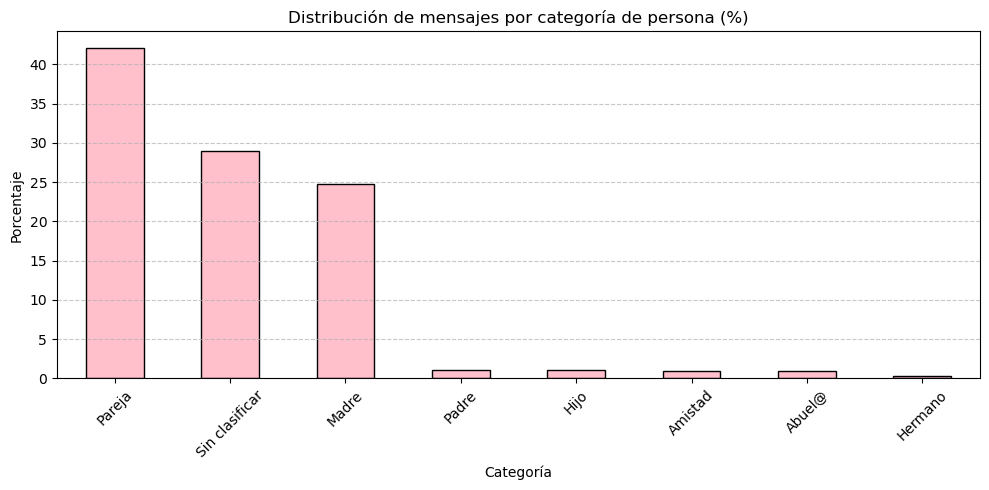

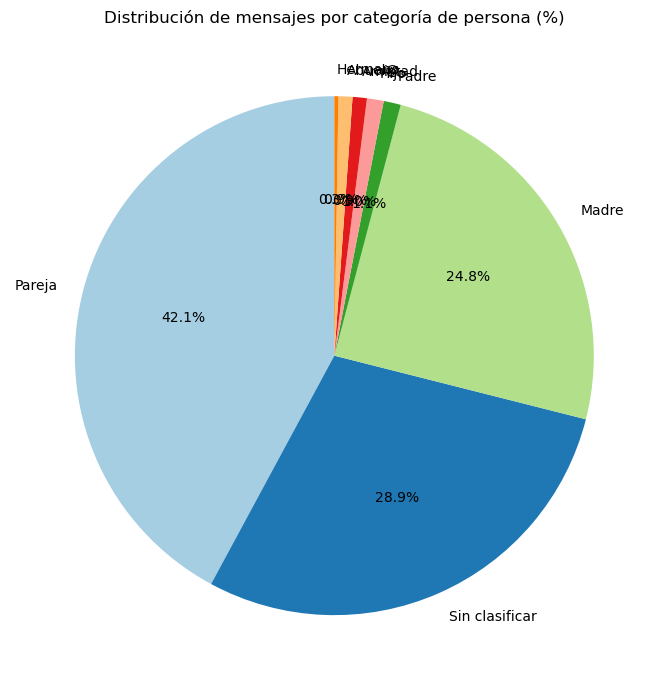

In [55]:
# Contar frecuencia de cada categoría
conteo = df['categoria_destinatario'].value_counts()
porcentajes = round(conteo / conteo.sum() * 100, 2)

# Gráfico de barras
plt.figure(figsize=(10, 5))
porcentajes.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Distribución de mensajes por categoría de persona (%)')
plt.ylabel('Porcentaje')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pastel
plt.figure(figsize=(7, 7))
porcentajes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de mensajes por categoría de persona (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()